###importar bibliotecas e dataset



In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('df_athlete_events.csv')

Saving df_athlete_events.csv to df_athlete_events.csv


###observacoes iniciais

In [3]:
df.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


###trabalhar com dados categoricos

In [4]:
df.describe(include =['object']).T #transpor: troca colunas com linhas

,count,unique,top,freq
Name,45567,32905,"Michael Fred Phelps, II",28
Sex,45567,6,M,31664
Weight,34926,188,70.0,1443
Team,45567,602,United States,5515
NOC,45567,201,USA,5957
Games,45567,51,2008 Summer,2321
Season,45567,5,Summer,38607
City,45567,43,London,4091
Sport,45567,66,Athletics,4811
Event,45567,760,Football Men's Football,1379


####acessar colunas + limpeza (quando necessário)

######"Name"


In [5]:
df.Name.unique() #tudo normal

array(['Edgar Lindenau Aabye', 'Per Knut Aaland', 'Arvo Ossian Aaltonen',
       ..., 'Galina Ivanovna Zybina (-Fyodorova)', 'Bogusaw Zych',
       'Olesya Nikolayevna Zykina'], dtype=object)

Aparentemente, não há dados esquisitos em "Name".

######"Sex"

In [6]:
pd.Series(df.Sex.unique()) # M, F, MALE, FEMALE, Vic vai te dar um socão, P&D >> Comunidade

0                          M
1                       MALE
2                     FEMALE
3                          F
4    Vic vai te dar um socao
5          P&D >> Comunidade
dtype: object

Alterando informações em "Sex"

Nessa coluna, temos dados que eram para ser binários - M ou F -, mas não são. Temos "M", "F", "MALE", "FEMALE", "Vic vai te dar um socão" e "P&D >> Comunidade". Por isso, irei transformar todos os valores "MALE" em "M" e "FEMALE" em "F".

In [7]:
df['Sex'].replace('MALE', 'M', inplace = True)
df['Sex'].replace('FEMALE', 'F', inplace = True)
pd.Series(df.Sex.unique())

0                          M
1                          F
2    Vic vai te dar um socao
3          P&D >> Comunidade
dtype: object

In [8]:
len(df[df['Sex']=='Vic vai te dar um socao'])

312

In [9]:
len(df[df['Sex']=='P&D >> Comunidade'])

333

In [10]:
total = len(df['Sex'])
a = len(df[df['Sex']=='Vic vai te dar um socao'])
b = len(df[df['Sex']=='P&D >> Comunidade'])
print(total)
print(f"Porcentagem 'Vic vai te dar um socao': {a/total * 100}%")
print(f"Porcentagem 'P&D >> Comunidade': {b/total * 100}%")

45567
Porcentagem 'Vic vai te dar um socao': 0.6847060372638093%
Porcentagem 'P&D >> Comunidade': 0.7307920205411812%


Como existem 333 valores de "P&D >> Comunidade" (aproximadamente 0.68%) e 312 valores (aproximadament 0.73%) de "Vic vai te dar um socao", irei substituí-los pela moda.

In [11]:
#substituindo pela moda
df['Sex'].replace('Vic vai te dar um socao', df['Sex'].mode()[0], inplace=True)
df['Sex'].replace('P&D >> Comunidade', df['Sex'].mode()[0], inplace = True)

######"Weight"

In [12]:
df.Weight.unique() #hsuahusahu

array([nan, '75.0', '85.0', '64.0', '72.0', '90.0', '87.0', '49.0',
       'hsuahusahu', '76.0', '83.0', '86.0', '82.0', '55.0', '67.0',
       '60.0', '79.0', '96.0', '97.0', '70.0', '88.0', '56.0', '80.0',
       '59.0', '91.0', '62.0', '63.0', '130.0', '104.0', '73.0', '84.0',
       '125.0', '50.0', '102.0', '48.0', '58.0', '78.0', '40.0', '68.0',
       '92.0', '61.0', '95.0', '89.0', '65.0', '93.0', '77.0', '46.0',
       '81.0', '52.0', '54.0', '57.0', '69.0', '99.0', '69.5', '51.0',
       '120.0', '74.0', '110.0', '100.0', '66.0', '47.0', '116.0',
       '107.0', '53.0', '45.0', '105.0', '109.0', '156.0', '71.0', '98.0',
       '160.0', '106.0', '146.0', '44.0', '138.0', '141.0', '94.0',
       '118.0', '101.0', '39.0', '32.0', '112.0', '115.0', '74.5',
       '121.0', '135.0', '111.0', '43.0', '36.0', '67.5', '114.0',
       '132.0', '65.5', '42.0', '59.5', '127.5', '108.0', '35.0', '117.0',
       '103.0', '58.5', '214.0', '113.0', '146.5', '116.5', '140.0',
       '38.0', '

Nessa coluna, os dados deveriam todos ser numéricos. No entanto, temos "hsuahusahu". Irei substituí-lo pela moda.

In [13]:
len(df[df['Weight']=='hsuahusahu'])

500

In [14]:
total = len(df['Weight'])
a = len(df[df['Weight']=='hsuahusahu'])
print(total)
print(f"Porcentagem 'hsuahusahu': {a/total * 100}%")

45567
Porcentagem 'hsuahusahu': 1.0972853161278997%


Como existem 500 valores de "hsuahusahu" (aproximadamente 1.09%), irei substituí-los pela moda.

In [15]:
#substituindo pela moda
df['Weight'].replace('hsuahusahu', df['Weight'].mode()[0], inplace=True)

######"Team"

In [16]:
df.Team.unique() 

array(['Denmark/Sweden', 'United States', 'Finland', 'Norway',
       'Netherlands', 'Taifun', 'France', 'Italy', 'Spain', 'Azerbaijan',
       'Russia', 'Argentina', 'Belarus', 'Cameroon', 'Hungary',
       'Thessalonki-1', 'Australia', 'Egypt', 'Iran', 'Canada',
       'Pakistan', 'Soviet Union', 'Uzbekistan', 'Tajikistan',
       'Unified Team', 'Japan', 'Ethiopia', 'Switzerland', 'East Germany',
       'Germany', 'Monaco', 'Fornebo', 'Vesper Boat Club', 'Sweden',
       'South Africa', 'Turkey', 'Bulgaria', 'Great Britain', 'Poland',
       'Djibouti', 'Jordan', 'Romania', 'Cuba', 'Puerto Rico',
       'Venezuela', 'Mexico', 'Ghana', 'Morocco', 'New Zealand',
       'Switzerland-1', 'Switzerland-2', 'Uruguay', 'Denmark',
       'Czechoslovakia', 'Nigeria', 'Kenya', 'Brazil', 'France-1',
       'Germany-2', 'Austria', 'Lithuania', 'Belgium', 'Stella-2',
       'United States-1', 'West Germany',
       'Large boat, Central Naval Prep School "Poros"-1', 'Benin',
       'Panama', 'El S

Aparentemente, está tudo adequado.

######"NOC"

In [17]:
df.NOC.unique() #tudo normal

array(['DEN', 'USA', 'FIN', 'NOR', 'NED', 'FRA', 'ITA', 'ESP', 'AZE',
       'RUS', 'ARG', 'BLR', 'CMR', 'HUN', 'GRE', 'AUS', 'EGY', 'IRI',
       'CAN', 'PAK', 'URS', 'UZB', 'TJK', 'EUN', 'JPN', 'ETH', 'SUI',
       'GDR', 'GER', 'MON', 'SWE', 'RSA', 'TUR', 'BUL', 'GBR', 'POL',
       'DJI', 'JOR', 'ROU', 'CUB', 'PUR', 'VEN', 'MEX', 'GHA', 'MAR',
       'NZL', 'URU', 'TCH', 'NGR', 'KEN', 'BRA', 'AUT', 'LTU', 'BEL',
       'FRG', 'BEN', 'PAN', 'ESA', 'INA', 'MAS', 'KOR', 'CHI', 'MTN',
       'UKR', 'SCG', 'UGA', 'IRQ', 'SYR', 'QAT', 'KUW', 'OMA', 'PLE',
       'IOA', 'KSA', 'UAE', 'CRO', 'COL', 'ARM', 'SRB', 'ISL', 'NIG',
       'ISV', 'PNG', 'SUD', 'IND', 'BIH', 'ALG', 'JAM', 'TTO', 'CIV',
       'PHI', 'LUX', 'POR', 'BOT', 'ROT', 'TUN', 'PRK', 'CHN', 'YUG',
       'MAD', 'GUY', 'KAZ', 'ISR', 'IRL', 'IVB', 'DOM', 'GEO', 'EST',
       'HAI', 'CZE', 'AFG', 'SVK', 'SAA', 'PAR', 'BAH', 'ANZ', 'MNE',
       'GUA', 'AND', 'ANG', 'SLO', 'TAN', 'BER', 'LIB', 'MRI', 'ALB',
       'KGZ', 'BAR',

Aparentemente, está tudo adequado.

######"Games"

In [18]:
df.Games.unique() #tudo normal

array(['1900 Summer', '1992 Winter', '1920 Summer', '2014 Winter',
       '1948 Summer', '1952 Summer', '1994 Winter', '2002 Winter',
       '2006 Winter', '2008 Summer', '1988 Summer', '1996 Summer',
       '1952 Winter', '1960 Winter', '1912 Summer', '1956 Summer',
       '2016 Summer', '2000 Summer', '2012 Summer', '2004 Summer',
       '1980 Summer', '1984 Summer', '1992 Summer', '1936 Summer',
       '1906 Summer', '1964 Summer', '1960 Summer', '1972 Summer',
       '1924 Summer', '1924 Winter', '1904 Summer', '1932 Summer',
       '1928 Winter', '1998 Winter', '1988 Winter', '1968 Winter',
       '1976 Summer', '2010 Winter', '1908 Summer', '1928 Summer',
       '1968 Summer', '1972 Winter', '1980 Winter', '1984 Winter',
       '1936 Winter', '1956 Winter', '1976 Winter', '1964 Winter',
       '1948 Winter', '1932 Winter', '1896 Summer'], dtype=object)

Aparentemente, está tudo adequado.

######Season

In [19]:
df.Season.unique() #ForaBolsonaro, Ele nunca, Ele não

array(['Summer', 'Winter', '#ForaBolsonaro', 'Ele nunca', 'Ele não'],
      dtype=object)

Nessa coluna, temos daos que deveria ser binários - "Summer"ou "Winter"-, mas temos, além desses, "#ForaBolsonaro", "Ele nunca" e "Ele não". 

In [20]:
len(df[df['Season']=='#ForaBolsonaro'])

72

In [21]:
len(df[df['Season']=='Ele nunca'])

30

In [22]:
len(df[df['Season']=='Ele não'])

50

In [23]:
total = len(df['Season'])
a = len(df[df['Season']=='#ForaBolsonaro'])
b = len(df[df['Season']=='Ele nunca'])
c = len(df[df['Season']=='Ele não'])
print(total)
print(f"Porcentagem '#ForaBolsonaro': {a/total * 100}%")
print(f"Porcentagem 'Ele nunca': {b/total * 100}%")
print(f"Porcentagem 'Ele não': {c/total * 100}%")

45567
Porcentagem '#ForaBolsonaro': 0.15800908552241755%
Porcentagem 'Ele nunca': 0.06583711896767397%
Porcentagem 'Ele não': 0.10972853161278996%


Como existem 72 valores de "#ForaBolsonaro" (aproximadamente 0.16%), 45 de "Ele nunca" (aproximadamente 0.07%) e 50 de "Ele não" (aproximadamente 0.11%), irei substituí-los pela moda.

In [24]:
#substituindo pela moda
df['Season'].replace('#ForaBolsonaro', df['Season'].mode()[0], inplace=True)
df['Season'].replace('Ele nunca', df['Season'].mode()[0], inplace = True)
df['Season'].replace('Ele não', df['Season'].mode()[0], inplace=True)

######"City"

In [25]:
df.City.unique() #######

array(['Paris', 'Albertville', 'Antwerpen', 'Sochi', 'London', 'Helsinki',
       'Lillehammer', 'Salt Lake City', 'Torino', 'Beijing', 'Seoul',
       'Atlanta', 'Oslo', 'Squaw Valley', 'Stockholm', 'Melbourne',
       'Rio de Janeiro', 'Sydney', 'Athina', 'Moskva', 'Los Angeles',
       'Barcelona', 'Berlin', 'Tokyo', 'Roma', 'Munich', 'Chamonix',
       'St. Louis', 'Sankt Moritz', 'Nagano', 'Calgary', 'Grenoble',
       'Montreal', 'Vancouver', 'Amsterdam', 'Mexico City', 'Sapporo',
       'Lake Placid', 'Sarajevo', 'Garmisch-Partenkirchen',
       "Cortina d'Ampezzo", 'Innsbruck', '######'], dtype=object)

Nessa coluna, os dados deveriam ser nomes. No entanto, temos "######"

In [26]:
len(df[df['City']=='######'])

134

In [27]:
total = len(df['City'])
a = len(df[df['City']=='######'])
print(total)
print(f"Porcentagem '######': {a/total * 100}%")

45567
Porcentagem '######': 0.2940724647222771%


Como existem 134 valores de "######" (aproximadamente 0.29%), irei substituí-los pela moda.

In [28]:
#substituindo pela moda
df['City'].replace('######', df['City'].mode()[0], inplace=True)

######"Sport"

In [29]:
df.Sport.unique()

array(['Tug-Of-War', 'Cross Country Skiing', 'Swimming', 'Ice Hockey',
       'Gymnastics', 'Alpine Skiing', 'Handball', 'Hockey', 'Rowing',
       'Football', 'Speed Skating', 'Sailing', 'Cycling', 'Fencing',
       'Taekwondo', 'Athletics', 'Canoeing', 'Water Polo', 'Wrestling',
       'Modern Pentathlon', 'Figure Skating', 'Golf', 'Softball',
       'Volleyball', 'Boxing', 'Basketball', 'Nordic Combined',
       'Baseball', 'Diving', 'Shooting', 'Freestyle Skiing', 'Bobsleigh',
       'Equestrianism', 'Curling', 'Judo', 'Tennis', 'Badminton',
       'Rugby Sevens', 'Rhythmic Gymnastics', 'Weightlifting',
       'Beach Volleyball', 'Ski Jumping', 'Rugby',
       'Short Track Speed Skating', 'Archery', 'Biathlon', 'Lacrosse',
       'Synchronized Swimming', 'Triathlon', 'Polo', 'Luge',
       'Table Tennis', 'Art Competitions', 'Snowboarding', 'Cricket',
       'Skeleton', 'Racquets', 'Military Ski Patrol', 'Croquet', 'Roque',
       'Alpinism', 'Trampolining', 'Basque Pelota', 'Motor

Aparentemente, está tudo adequado.

######"Event"

In [30]:
df.Event.unique() 

array(["Tug-Of-War Men's Tug-Of-War",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Ice Hockey Men's Ice Hockey",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Pommelled Horse", "Alpine Skiing Men's Super G",
       "Alpine Skiing Men's Giant Slalom", "Alpine Skiing Men's Downhill",
       "Alpine Skiing Men's Combined", "Handball Women's Handball",
       "Gymnastics Men's Team All-Around, Free System",
       "Hockey Women's Hockey", "Rowing Men's Lightweight Double Sculls",
       "Football Women's Football", "Speed Skating Men's 1,500 metres",
       'Sailing Mixed 8 metres', "Cycling Men's Road Race, Team",
       "Rowing Men's Coxless Pairs", "Fencing Men's epee, Individual",
       "Taekwondo Women's Flyweight", "Athletics Women's Javelin Throw",
       "Swi

Aparentemente, está tudo adequado.

######"Medal"

In [31]:
pd.Series(df.Medal.unique()) #Gold, Bronze, Silver, Nelson, Nan

0      Gold
1       NaN
2    Bronze
3    Silver
4    Nelson
dtype: object

Nessa coluna, deveríamos ter somente 3 valores para medalhas. No entanto, temos 5: "Gold", "Silver", "Bronze", "Nan" e "Nelson".

In [32]:
len(df[df['Medal']=='Nelson'])

166

In [33]:
total = len(df["Medal"])
a = len(df[df['Medal']=='Nelson'])
print(total)
print(f"Porcentagem 'Nelson': {a/total * 100}%")

45567
Porcentagem 'Nelson': 0.36429872495446264%


Como existem 166 valores de "Nelson" (aproximadamente 0.36%), irei substituir pela moda. Irei mexer com "Nan" a seguir.

In [34]:
df['Medal'].replace('Nelson', df['Medal'].mode()[0], inplace=True)

######"Nan"

In [35]:
df.isna().any()

Athlete_ID    False
Name          False
Sex           False
Age            True
Height         True
Weight         True
Team          False
NOC           False
Games         False
Year          False
Season        False
City          False
Sport         False
Event         False
Medal          True
dtype: bool

In [36]:
totalage = len(df["Age"])
totalhei = len(df["Height"])
totalwei = len(df["Weight"])
totalmed = len(df["Medal"])
a = df['Age'].isna().sum()
b = df['Height'].isna().sum()
c = df['Weight'].isna().sum()
d = df['Medal'].isna().sum()
print(f"Porcentagem 'Nan' em 'Age': {a/totalage * 100}%")
print(f"Porcentagem 'Nan' em 'Height': {b/totalhei * 100}%")
print(f"Porcentagem 'Nan' em 'Weight': {c/totalwei * 100}%")
print(f"Porcentagem 'Nan' em 'Medal': {d/totalmed * 100}%")

Porcentagem 'Nan' em 'Age': 2.1353172251848926%
Porcentagem 'Nan' em 'Height': 21.989597735203105%
Porcentagem 'Nan' em 'Weight': 23.35242609783396%
Porcentagem 'Nan' em 'Medal': 12.647310553690168%


"Age" (2.13%), "Height" (21.99%), "Weight" (23.35%) e "Medal" (12.65%) tem Nan. Substituirei todos esses valores pela moda.

In [37]:
df['Medal'].replace(np.nan, df['Medal'].mode()[0], inplace=True)
df['Age'].replace(np.nan, df['Age'].mode()[0], inplace=True)
df['Height'].replace(np.nan, df['Height'].mode()[0], inplace=True)
df['Weight'].replace(np.nan, df['Weight'].mode()[0], inplace=True)

###trabalhar com dados numericos

In [38]:
df.describe()

,Athlete_ID,Age,Height,Year
count,45567.000000,45567.000000,4.556700e+04,45567.000000
mean,69129.286282,25.790462,7.986177e+02,1972.391094
std,38866.485546,5.916386,3.044485e+04,94.200678
min,4.000000,10.000000,1.320000e+02,-2992.000000
25%,36105.500000,22.000000,1.720000e+02,1952.000000
50%,68634.000000,25.000000,1.800000e+02,1984.000000
75%,103181.000000,28.000000,1.820000e+02,2002.000000
max,135563.000000,73.000000,1.976779e+06,2016.000000


####Age

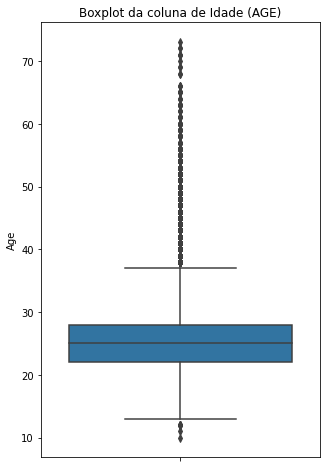

In [39]:
plt.figure(figsize=(5,8))
sns.boxplot(y=df['Age'])
plt.title("Boxplot da coluna de Idade (AGE)")
plt.show()

Há outliers. Pessoa mais velha que já participou de olimpíada tinha 72 anos e mais nova, 13 anos.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

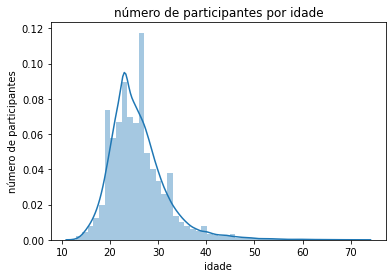

In [40]:
df = df[df['Age'] > 12]
df = df[df['Age'] <= 72]

sns.distplot(df["Age"].dropna())
plt.title('número de participantes por idade')
plt.xlabel("idade")
plt.ylabel("número de participantes")
plt.show

A maioria dos atletas tem entre 20 e 30 anos.

####Height

In [41]:
df["Height"].min()

132.0

In [42]:
df["Height"].max()


1976779.0

Para que os dados em "Height" façam sentido, é preciso restringi-los a um intervalo.

In [43]:
df = df[df["Height"] < 270]

####Year

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

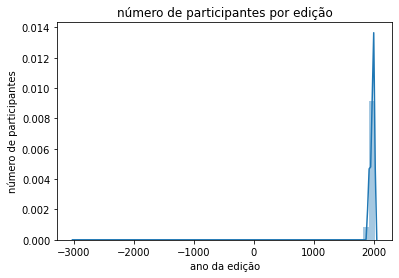

In [44]:
sns.distplot(df["Year"].dropna())
plt.title('número de participantes por edição')
plt.xlabel("ano da edição")
plt.ylabel("número de participantes")
plt.show

Há outliers.

In [45]:
df = df[df["Year"] >= 1896]
df = df[df["Year"] < 2022]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

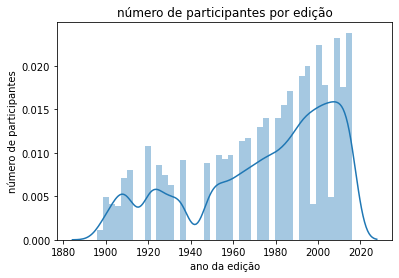

In [46]:
sns.distplot(df["Year"].dropna())
plt.title('número de participantes por edição')
plt.xlabel("ano da edição")
plt.ylabel("número de participantes")
plt.show

###plotar alguns graficos dos dados categoricos

####"Sex"

<function matplotlib.pyplot.show>

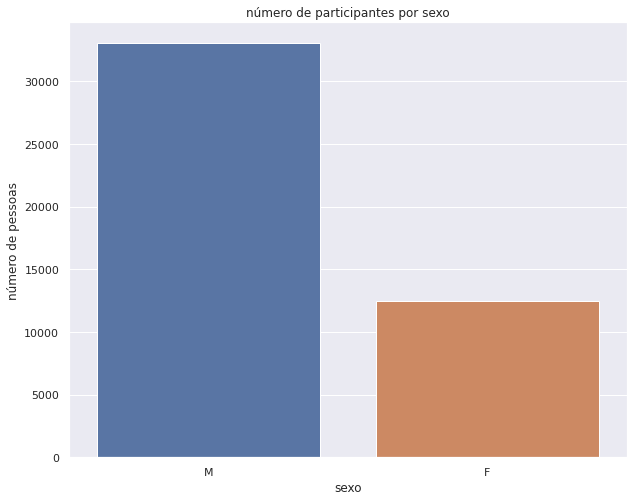

In [47]:
plt.figure(figsize=(10,8))
sns.set_theme(style = 'darkgrid')
sns.countplot(x=df["Sex"])
plt.title('número de participantes por sexo')
plt.xlabel("sexo")
plt.ylabel("número de pessoas")
plt.show

In [48]:
totalsex = len(df["Sex"])
totalfem = len(df[df["Sex"] == "F"])
totalmale = len(df[df["Sex"] == "M"])
print(f"Porcentagem 'F': {totalfem/totalsex * 100}%")
print(f"Porcentagem 'M': {totalmale/totalsex * 100}%")
print(f"Porcentagem 'F' em relação a 'M': {totalfem/totalmale * 100}%")
print(f"Porcentagem 'M' em relação a 'F': {totalmale/totalfem * 100}%")

Porcentagem 'F': 27.409181812188205%
Porcentagem 'M': 72.59081818781179%
Porcentagem 'F' em relação a 'M': 37.758469316702495%
Porcentagem 'M' em relação a 'F': 264.8412443874278%


Mulheres são aproximadamente 27.42% enquanto homens constituem aproximadamente 72.58%. A quantidade de homens é aproximadamente 2,6 vezes maior que a de mulheres.

####"Age"

<function matplotlib.pyplot.show>

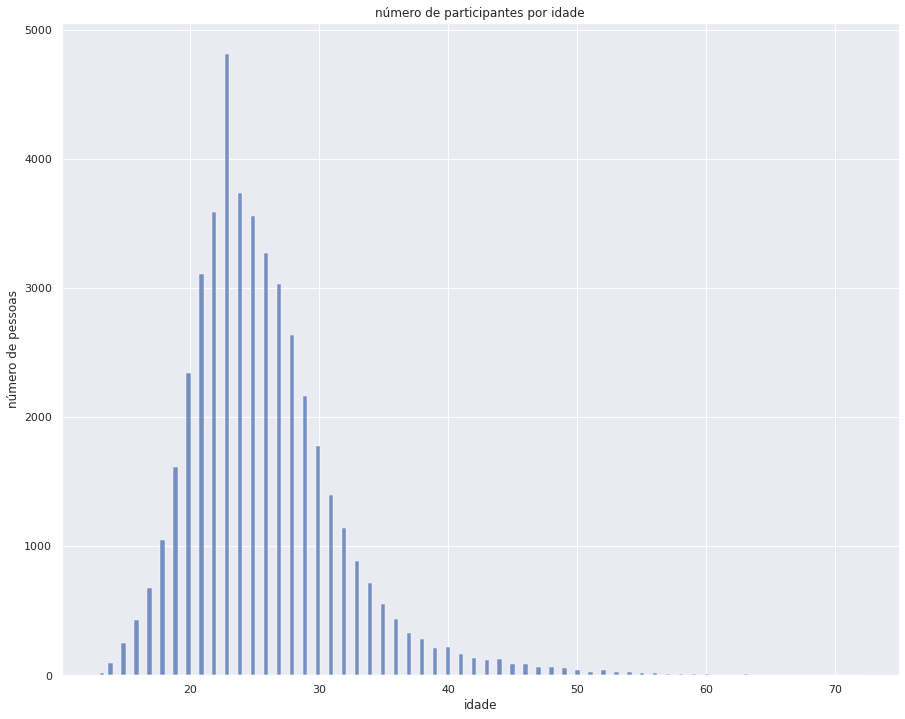

In [49]:
plt.figure(figsize=(15,12))
sns.set_theme(style = 'darkgrid')
sns.histplot(x=df["Age"])
plt.title('número de participantes por idade')
plt.xlabel("idade")
plt.ylabel("número de pessoas")
plt.show

In [50]:
df["Age"].describe()

count    45503.000000
mean        25.793200
std          5.910639
min         13.000000
25%         22.000000
50%         25.000000
75%         28.000000
max         72.000000
Name: Age, dtype: float64

Um grande numero de participantes tem entre 20 e 30 anos. A idade média é 25.40 anos.

####"Season"

<function matplotlib.pyplot.show>

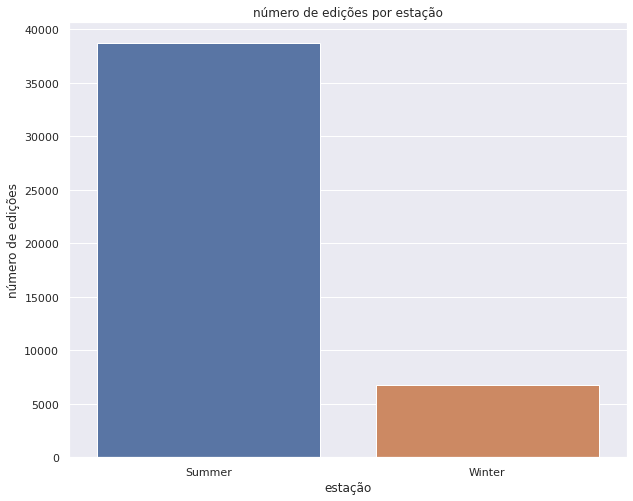

In [51]:
plt.figure(figsize=(10,8))
sns.set_theme(style = 'darkgrid')
sns.countplot(x=df["Season"])
plt.title('número de edições por estação')
plt.xlabel("estação")
plt.ylabel("número de edições")
plt.show

In [52]:
df.groupby("Season")["Year"].describe()

,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
Summer,38701.0,1972.454045,34.314965,1896.0,1952.0,1980.0,2000.0,2016.0
Winter,6802.0,1986.679506,23.730956,1924.0,1972.0,1994.0,2006.0,2014.0


Há mais edições de verão do que de inverno. A primeira vez que ocorreu uma edição de inverno foi em 1924 enquanto as de verão já ocorriam desde 1896.

####"Sport"

In [53]:
df["Sport"].value_counts()

Athletics        4806
Swimming         3546
Rowing           3127
Gymnastics       2864
Fencing          1960
                 ... 
Motorboating        8
Roque               3
Jeu De Paume        3
Basque Pelota       2
Aeronautics         1
Name: Sport, Length: 66, dtype: int64

In [54]:
df[df["Sport"] == "Aeronautics"]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
35594,107506,Hermann Schreiber,M,26.0,180.0,70.0,Switzerland,SUI,1936 Summer,1936,Summer,Berlin,Aeronautics,Aeronautics Mixed Aeronautics,Gold


In [55]:
df[df["Sport"] == "Basque Pelota"]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
7987,25866,Jos de Amzola y Aspiza,M,26.0,180.0,70.0,Spain,ESP,1900 Summer,1900,Summer,Paris,Basque Pelota,Basque Pelota Men's Two-Man Teams With Cesta,Gold
42242,126675,Francisco Villota y Baquiola,M,26.0,180.0,70.0,Spain,ESP,1900 Summer,1900,Summer,Paris,Basque Pelota,Basque Pelota Men's Two-Man Teams With Cesta,Gold


In [56]:
df[df["Sport"] == "Roque"]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4785,15484,Charles Brown,M,37.0,180.0,70.0,United States,USA,1904 Summer,1904,Summer,St. Louis,Roque,Roque Men's Singles,Bronze
17333,53238,Charles Jacobus,M,64.0,180.0,70.0,United States,USA,1904 Summer,1904,Summer,St. Louis,Roque,Roque Men's Singles,Gold
38495,115733,Smith O. Streeter,M,59.0,180.0,70.0,United States,USA,1904 Summer,1904,Summer,St. Louis,Roque,Roque Men's Singles,Silver


In [57]:
df[df["Sport"] == "Athletics"].describe()

,Athlete_ID,Age,Height,Year
count,4806.000000,4806.000000,4806.000000,4806.000000
mean,66857.381814,25.008531,177.638369,1967.862256
std,38826.244717,4.086287,8.763365,34.990520
min,67.000000,15.000000,150.000000,1896.000000
25%,32769.750000,22.000000,172.000000,1936.000000
50%,66304.500000,24.000000,178.000000,1976.000000
75%,100840.250000,27.000000,183.000000,1996.000000
max,135563.000000,48.000000,207.000000,2016.000000


In [58]:
df[df["Sport"] == "Swimming"].describe()

,Athlete_ID,Age,Height,Year
count,3546.000000,3546.000000,3546.000000,3546.000000
mean,70367.983080,20.899323,180.447829,1978.851100
std,38686.612641,3.685716,9.021380,29.646166
min,15.000000,13.000000,142.000000,1896.000000
25%,37814.250000,18.000000,175.000000,1964.000000
50%,69462.500000,21.000000,180.000000,1984.000000
75%,105041.750000,23.000000,186.000000,2004.000000
max,135522.000000,46.000000,208.000000,2016.000000


In [59]:
df[df["Sport"] == "Rowing"].describe()

,Athlete_ID,Age,Height,Year
count,3127.000000,3127.000000,3127.000000,3127.000000
mean,68166.141350,25.444516,183.215542,1970.008954
std,39183.067508,4.422074,9.080551,34.287258
min,62.000000,13.000000,140.000000,1900.000000
25%,33563.000000,23.000000,180.000000,1948.000000
50%,67562.000000,25.000000,181.000000,1980.000000
75%,103104.000000,28.000000,190.000000,1996.000000
max,135545.000000,58.000000,208.000000,2016.000000


Os esportes mais frequentes são Atletismo, Natação e Remo. Já os menos são Roque, Basque Pelota e Aeronautics. 

Em 1936, houve um atleta que participou em "Aeronautics".
Em 1900, houve dois atletas que participaram em "Basque Pelota".
Em 1904, houve três atletas que participaram em "Roque".

A primeira edição que teve Atletismo coincidiu com a primeira que teve Natação (1896). Já a última também coincidiu e foi em 2016.
A primeira edição que teve Remo foi em 1900. Já a última foi em 2016.

####"Medal"

<function matplotlib.pyplot.show>

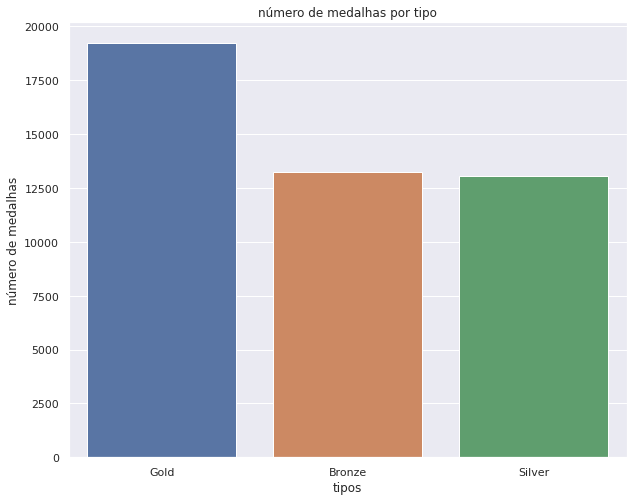

In [60]:
plt.figure(figsize=(10,8))
sns.set_theme(style = 'darkgrid')
sns.countplot(x=df["Medal"])
plt.title('número de medalhas por tipo')
plt.xlabel("tipos")
plt.ylabel("número de medalhas")
plt.show

In [61]:
df.groupby("Medal")["Year"].describe()

,count,mean,std,min,25%,50%,75%,max
Medal,,,,,,,,
Bronze,13233.0,1975.135343,33.179460,1896.0,1956.0,1984.0,2002.0,2016.0
Gold,19226.0,1974.973994,32.900273,1896.0,1956.0,1984.0,2002.0,2016.0
Silver,13044.0,1973.437749,34.104008,1896.0,1952.0,1984.0,2002.0,2016.0


In [62]:
totalmed = len(df["Medal"])
totalgol = len(df[df["Medal"] == "Gold"])
totalsil = len(df[df["Medal"] == "Silver"])
totalbro = len(df[df["Medal"] == "Bronze"])
print(f"Porcentagem 'Gold': {totalgol/totalmed * 100}%")
print(f"Porcentagem 'Silver': {totalsil/totalmed * 100}%")
print(f"Porcentagem 'Bronze': {totalbro/totalmed * 100}%")

Porcentagem 'Gold': 42.25215919829462%
Porcentagem 'Silver': 28.666241786255853%
Porcentagem 'Bronze': 29.081599015449534%


42.25% das medalhas são de ouro, 28.67% de prata e 29.08% de bronze.

####"NOC"

In [63]:
df["NOC"].value_counts()

USA    5951
URS    2584
GER    2346
GBR    2320
FRA    2041
       ... 
KOS       1
YEM       1
SOL       1
VIN       1
FSM       1
Name: NOC, Length: 201, dtype: int64

In [64]:
df["NOC"].describe()

count     45503
unique      201
top         USA
freq       5951
Name: NOC, dtype: object

Os países que têm mais atletas participando são USA, URS e GER. Já os que tem menos são SWZ, FSM e YEM.

####"Weight"

In [65]:
pd.to_numeric(df["Weight"])

0        70.0
1        75.0
2        70.0
3        70.0
4        85.0
         ... 
45562    80.0
45563    80.0
45564    82.0
45565    64.0
45566    64.0
Name: Weight, Length: 45503, dtype: float64

<function matplotlib.pyplot.show>

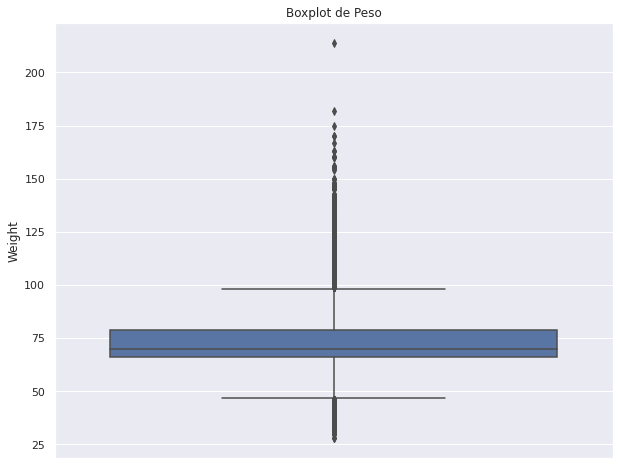

In [66]:
weightfloat = pd.to_numeric(df["Weight"])
plt.figure(figsize=(10,8))
sns.boxplot(y = pd.to_numeric(df["Weight"]))
plt.title('Boxplot de Peso')
plt.show


In [67]:
media = weightfloat.mean()
mediana = weightfloat.median()
maxi = weightfloat.max()
mini = weightfloat.min()

print(f"Peso médio: {media}")
print(f"Peso mediano: {mediana}")
print(f"Peso máximo: {maxi}")
print(f"Peso mínimo: {mini}")

Peso médio: 72.6329106505798
Peso mediano: 70.0
Peso máximo: 214.0
Peso mínimo: 28.0


Conforme visto no boxplot, a maioria dos jogadores pesa entre 70Kg e 80Kg. O peso mínimo é 28Kg enquanto o máximo é 214Kg. Já o médio é 72.63Kg e o mediano 70Kg.

####"Height"

In [68]:
df["Height"].describe()

count    45503.000000
mean       177.828759
std          9.665292
min        132.000000
25%        172.000000
50%        180.000000
75%        182.000000
max        223.000000
Name: Height, dtype: float64

<function matplotlib.pyplot.show>

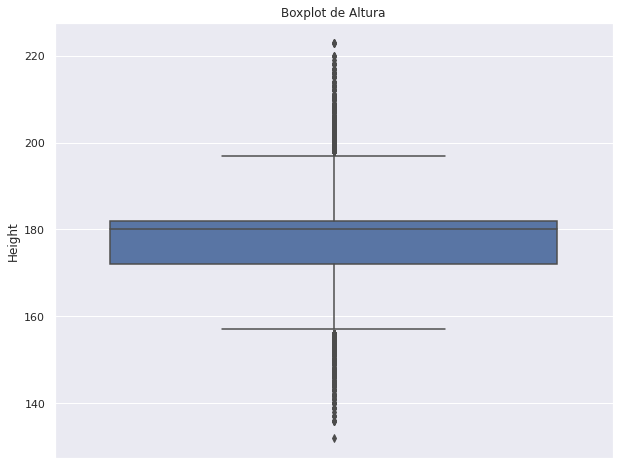

In [69]:
plt.figure(figsize=(10,8))
sns.boxplot(y = df["Height"])
plt.title('Boxplot de Altura')
plt.show

A maioria dos atletas tem entre 170cm e 190cm de altura. A média é 177cm enquanto a mediana é 178cm. A altura máxima 223cm é e a mínima é 136cm.

###Análises extras

####Brasil

In [71]:
df[df["NOC"]=="BRA"].describe()

,Athlete_ID,Age,Height,Year
count,561.000000,561.000000,561.000000,561.000000
mean,62096.308378,25.693405,181.837790,1995.229947
std,39428.310741,5.072205,10.753591,20.008005
min,918.000000,15.000000,151.000000,1920.000000
25%,26367.000000,22.000000,175.000000,1988.000000
50%,56250.000000,25.000000,181.000000,2000.000000
75%,100406.000000,29.000000,189.000000,2008.000000
max,134211.000000,51.000000,212.000000,2016.000000


In [72]:
df[(df["NOC"]=="BRA") & (df["Team"] == "Brazil")].describe()

,Athlete_ID,Age,Height,Year
count,535.000000,535.000000,535.000000,535.000000
mean,61815.355140,25.465421,181.699065,1994.728972
std,39211.677402,5.026728,10.689922,20.301828
min,918.000000,15.000000,151.000000,1920.000000
25%,26234.000000,22.000000,175.000000,1988.000000
50%,56163.000000,24.000000,181.000000,2000.000000
75%,99436.000000,28.000000,188.000000,2008.000000
max,134211.000000,51.000000,212.000000,2016.000000


In [73]:
df[(df["NOC"]=="BRA")]["Team"].value_counts()

Brazil      535
Brazil-1     20
Brazil-2      6
Name: Team, dtype: int64

Os atletas brasileiros estão divididos em 3 times. Irei colocá-los todos como "Brazil".

In [74]:
df['Team'].replace('Brazil-1', 'Brazil', inplace = True)
df['Team'].replace('Brazil-2', 'Brazil', inplace = True)
df[(df["NOC"]=="BRA")]["Team"].value_counts()

Brazil    561
Name: Team, dtype: int64

In [75]:
df.describe()

,Athlete_ID,Age,Height,Year
count,45503.000000,45503.000000,45503.000000,45503.000000
mean,69162.290596,25.793200,177.828759,1974.580533
std,38844.819960,5.910639,9.665292,33.337579
min,4.000000,13.000000,132.000000,1896.000000
25%,36162.500000,22.000000,172.000000,1952.000000
50%,68647.000000,25.000000,180.000000,1984.000000
75%,103198.500000,28.000000,182.000000,2002.000000
max,135563.000000,72.000000,223.000000,2016.000000


A idade média dos atletas brasileiros é 25.73 anos, o que faz com que ela seja maior que a idade média geral. A idade mínima entre os brasileiros é 15 anos e a máxima é 51 anos. 

A altura média dos atletas brasileiros é 182cm, o que faz com que ela seja maior que a altura média geral. A altura mínima é 151cm e a máxima é 212cm.



In [76]:
df[df["NOC"]=="BRA"].describe(include =['object']).T

,count,unique,top,freq
Name,561,437,Torben Schmidt Grael,5
Sex,561,2,M,403
Weight,561,62,70.0,67
Team,561,1,Brazil,561
NOC,561,1,BRA,561
Games,561,22,2008 Summer,82
Season,561,2,Summer,560
City,561,20,Beijing,82
Sport,561,23,Football,141
Event,561,106,Football Men's Football,102


In [77]:
totalsex = 529
totalmale = 374
totalfem = totalsex - totalmale
print(f"Porcentagem 'F': {totalfem/totalsex * 100}%")
print(f"Porcentagem 'M': {totalmale/totalsex * 100}%")
print(f"Porcentagem 'F' em relação a 'M': {totalfem/totalmale * 100}%")
print(f"Porcentagem 'M' em relação a 'F': {totalmale/totalfem * 100}%")

Porcentagem 'F': 29.300567107750474%
Porcentagem 'M': 70.69943289224952%
Porcentagem 'F' em relação a 'M': 41.44385026737968%
Porcentagem 'M' em relação a 'F': 241.29032258064518%


Mulheres são aproximadamente 29.30% enquanto homens constituem aproximadamente 70.70%. A quantidade de homens é aproximadamente 2,4 vezes maior que a de mulheres.

In [78]:
df[df["NOC"]=="BRA"].groupby("Medal")["Sport"].value_counts(ascending = True)

Medal   Sport                
Bronze  Canoeing                  1
        Gymnastics                1
        Modern Pentathlon         1
        Taekwondo                 2
        Boxing                    3
        Shooting                  5
        Beach Volleyball          6
        Equestrianism             8
        Athletics                14
        Judo                     15
        Swimming                 15
        Sailing                  16
        Volleyball               23
        Football                 34
        Basketball               46
Gold    Alpine Skiing             1
        Synchronized Swimming     1
        Taekwondo                 1
        Triathlon                 1
        Modern Pentathlon         2
        Table Tennis              2
        Cycling                   3
        Equestrianism             3
        Fencing                   3
        Shooting                  3
        Basketball                5
        Gymnastics                

In [79]:
df[(df["NOC"]=="BRA")]["Medal"].value_counts()

Gold      199
Bronze    190
Silver    172
Name: Medal, dtype: int64

O esporte em que o Brasil mais ganhou medalhas de ouro foi Vôlei, um total de 67 medalhas. Já a maior quantidade de medalhas de prata foi obtida no futebol, um total de 79. De bronze, foram 39 no basquete.

Na contagem geral, o Brasil ganhou mais medalhas em futebol, sendo 24 de ouro, 79 de prata e 34 de bronze, totalizando 137.

No total, já foram 183 medalhas de ouro, 167 de prata e 179 de bronze.

In [80]:
df[(df["NOC"]=="BRA")].groupby("Medal")["Height"].describe()

,count,mean,std,min,25%,50%,75%,max
Medal,,,,,,,,
Bronze,190.0,182.100000,8.365051,160.0,177.0,181.0,187.0,203.0
Gold,199.0,182.643216,11.396364,151.0,176.0,183.0,190.0,211.0
Silver,172.0,180.616279,12.192097,155.0,172.0,180.0,190.0,212.0


A altura média dos jogadores que ganharam medalha de ouro é 183cm.
A altura média dos jogadores que ganharam medalha de prata é 180cm.
A altura média dos jogadores que ganharam medalha de bronze é 182cm.

####Mulheres

In [81]:
df[df["Sex"]=="F"].describe()

,Athlete_ID,Age,Height,Year
count,12472.000000,12472.000000,12472.00000,12472.000000
mean,71191.572322,24.365539,170.79899,1992.199487
std,38918.527138,5.335076,9.04739,21.391658
min,21.000000,13.000000,136.00000,1900.000000
25%,38101.000000,21.000000,165.00000,1980.000000
50%,70364.000000,24.000000,171.00000,1998.000000
75%,105926.000000,27.000000,178.00000,2008.000000
max,135563.000000,69.000000,210.00000,2016.000000


In [82]:
df[(df["Sex"]=="F")]["NOC"].value_counts()

USA    1832
CHN     704
GER     703
URS     694
CAN     583
       ... 
GAM       1
KOS       1
ARM       1
QAT       1
FSM       1
Name: NOC, Length: 139, dtype: int64

In [83]:
df[(df["Sex"]=="F")]["Year"].value_counts()

2016    1073
2012    1016
2008    1013
2000     959
2004     957
1996     840
1992     779
1988     700
1984     600
1980     519
1976     480
1972     338
2014     314
1968     299
1964     296
2010     265
2006     261
2002     231
1960     223
1998     212
1952     197
1956     182
1994     131
1948     126
1928     105
1936     101
1932      73
1924      56
1920      46
1912      32
1908      17
1900      15
1904      10
1906       6
Name: Year, dtype: int64

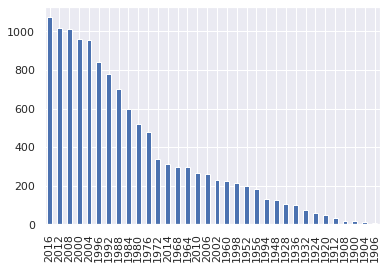

In [84]:
df[(df["Sex"]=="F")]["Year"].value_counts().plot(kind = "bar")

In [85]:
df[df["Year"]==2016]["Sex"].value_counts()

M    1237
F    1073
Name: Sex, dtype: int64

In [86]:
totalsex = len(df[df["Year"]==2016]["Sex"])
totalfem = len(df[df["Year"]==2016][df["Sex"] == "F"])
totalmale = len(df[df["Year"]==2016][df["Sex"] == "M"])
print(f"Porcentagem 'F': {totalfem/totalsex * 100}%")
print(f"Porcentagem 'M': {totalmale/totalsex * 100}%")
print(f"Porcentagem 'F' em relação a 'M': {totalfem/totalmale * 100}%")
print(f"Porcentagem 'M' em relação a 'F': {totalmale/totalfem * 100}%")

Porcentagem 'F': 46.45021645021645%
Porcentagem 'M': 53.54978354978355%
Porcentagem 'F' em relação a 'M': 86.74211802748584%
Porcentagem 'M' em relação a 'F': 115.28424976700839%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:
df[df["Year"]==1920]["Sex"].value_counts()

M    1329
F      46
Name: Sex, dtype: int64

In [88]:
totalsex = len(df[df["Year"]==1920]["Sex"])
totalfem = len(df[df["Year"]==1920][df["Sex"] == "F"])
totalmale = len(df[df["Year"]==1920][df["Sex"] == "M"])
print(f"Porcentagem 'F': {totalfem/totalsex * 100}%")
print(f"Porcentagem 'M': {totalmale/totalsex * 100}%")
print(f"Porcentagem 'F' em relação a 'M': {totalfem/totalmale * 100}%")
print(f"Porcentagem 'M' em relação a 'F': {totalmale/totalfem * 100}%")

Porcentagem 'F': 3.3454545454545452%
Porcentagem 'M': 96.65454545454546%
Porcentagem 'F' em relação a 'M': 3.4612490594431904%
Porcentagem 'M' em relação a 'F': 2889.1304347826085%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


O primeiro ano em que mulheres partiparam das Olimpíadas foi 1920. Um total de 11 mulheres (3.82%) e 288 homens (96.32%) estavam presentes. 

Desde então, a partição de pessoas do sexo feminino aumentou consideravelmente: na edição de 2016, de um total de 2304, 1071 (46.48%) eram mulheres.

Os comitês olímpicos com maior participação feminina são Estados Unidos (1705), China (697) e Alemanha (661).

####Medalhas

In [89]:
df[df["Medal"]== "Gold"]["NOC"].value_counts()

USA    2962
URS    1171
GBR     937
GER     935
ITA     777
       ... 
SKN       1
YEM       1
ERI       1
SOL       1
FSM       1
Name: NOC, Length: 197, dtype: int64

In [90]:
df[df["Medal"]== "Silver"]["NOC"].value_counts()

USA    1633
GBR     735
URS     727
GER     669
FRA     610
       ... 
GUA       1
QAT       1
HAI       1
KGZ       1
TGA       1
Name: NOC, Length: 128, dtype: int64

In [91]:
df[df["Medal"]== "Bronze"]["NOC"].value_counts()

USA    1356
GER     742
URS     686
FRA     663
GBR     648
       ... 
ZIM       1
SYR       1
TOG       1
IRQ       1
UAE       1
Name: NOC, Length: 125, dtype: int64

Os países que mais ganharam medalhas foram Estados Unidos (2487 de ouro, 1315 de prata e 1030 de bronze), URSS (1072 de ouro, 648 de prata e 627 de bronze) e Alemanha (701 de ouro, 510 de prata e 577 de bronze).

####Altura

In [92]:
df[df["Sex"]=="F"].groupby("Sport")["Height"].mean()

Sport
Alpine Skiing                170.365449
Alpinism                     180.000000
Archery                      168.820690
Art Competitions             180.000000
Athletics                    170.742682
Badminton                    170.467290
Basketball                   182.948148
Beach Volleyball             180.200000
Biathlon                     167.313830
Bobsleigh                    173.880000
Boxing                       167.428571
Canoeing                     171.318644
Croquet                      180.000000
Cross Country Skiing         166.788804
Curling                      167.802817
Cycling                      168.958763
Diving                       163.133929
Equestrianism                170.157658
Fencing                      170.551075
Figure Skating               165.469194
Football                     168.601266
Freestyle Skiing             165.114754
Golf                         173.000000
Gymnastics                   161.394737
Handball                     174.8

In [93]:
a = df[df["Sex"]=="F"].groupby("Sport")["Height"].mean()
print(a.max())
b = df[df["Sex"]=="F"].groupby("Sport")["Height"].mean()
print(b.min())

182.94814814814814
159.66949152542372


In [94]:
df[df["Sex"]=="M"].groupby("Sport")["Height"].mean()

Sport
Aeronautics         180.000000
Alpine Skiing       179.005865
Alpinism            180.000000
Archery             179.463035
Art Competitions    179.955882
                       ...    
Tug-Of-War          180.025641
Volleyball          193.602968
Water Polo          185.612798
Weightlifting       171.769481
Wrestling           174.850877
Name: Height, Length: 66, dtype: float64

In [95]:
a = df[df["Sex"]=="M"].groupby("Sport")["Height"].mean()
print(a.max())
b = df[df["Sex"]=="M"].groupby("Sport")["Height"].mean()
print(b.min())

195.5973509933775
167.0


In [96]:
df.groupby("Sport")["Height"].mean()

Sport
Aeronautics         180.000000
Alpine Skiing       174.954829
Alpinism            180.000000
Archery             175.624378
Art Competitions    179.959091
                       ...    
Tug-Of-War          180.025641
Volleyball          186.939275
Water Polo          183.885612
Weightlifting       169.824251
Wrestling           174.311806
Name: Height, Length: 66, dtype: float64

In [97]:
df.groupby("Sex")["Height"].mean()

Sex
F    170.798990
M    180.483092
Name: Height, dtype: float64

In [ ]:
a = df[df["Sex"]=="M"].groupby("Sport")["Height"].mean()
b = df[df["Sex"]=="F"].groupby("Sport")["Height"].mean()
print(a.le(b))
print(a.le(b).sum())

Sport
Aeronautics         False
Alpine Skiing       False
Alpinism             True
Archery             False
Art Competitions     True
                    ...  
Tug-Of-War          False
Volleyball          False
Water Polo          False
Weightlifting       False
Wrestling           False
Name: Height, Length: 66, dtype: bool
6


Há diferença de altura média entre os esportes. 

Tanto se considerarmos somente mulheres quanto se considerarmos somente homens, o esporte com a maior média é o basquete e o com a menor é Ginástica.

Além disso, na maioria dos esportes, a altura média de homens é maior que a de mulheres, com exceção de Ginástica Rítmica, Softball e Nado Sincronizado.

#### Relação altura e medalha

<function matplotlib.pyplot.show>

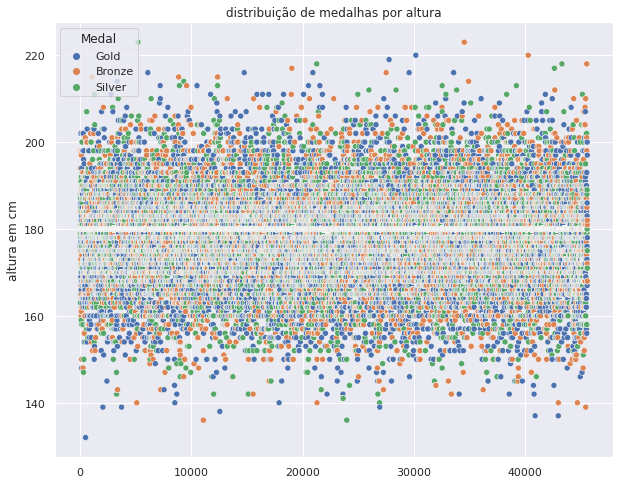

In [102]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x=df.index, y='Height', hue='Medal')

plt.title('distribuição de medalhas por altura')
plt.ylabel('altura em cm')
plt.show

<Figure size 720x576 with 0 Axes>

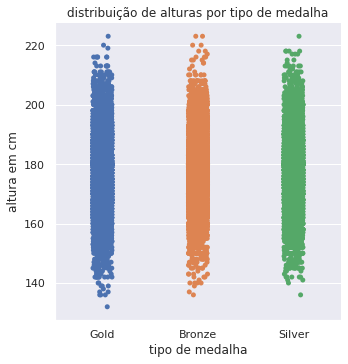

In [114]:
plt.figure(figsize=(10,8))
sns.catplot(x="Medal", y="Height", data=df)

plt.title('distribuição de alturas por tipo de medalha')
plt.ylabel('altura em cm')
plt.xlabel('tipo de medalha')

plt.show()

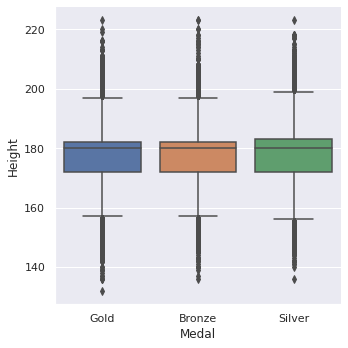

In [113]:
sns.catplot(x="Medal", y="Height", kind="box", data=df)


plt.title('distribuição de alturas por tipo de medalha')
plt.ylabel('altura em cm')
plt.xlabel('tipo de medalha')

A partir dos gráficos plotados acima, podemos ver que não há uma correlação entre a altura do atleta e a medalha que ele ganha. 